<a href="https://colab.research.google.com/github/HamsikaAS/DEL_LAB_1BM22AI052/blob/main/DEL_LAB_7_to_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7. Develop a program to classify the MNIST Dataset using Convolution Neural Network[CNN]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to add a channel dimension (28x28x1 for grayscale images)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Build the CNN model
model = Sequential([
Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(64, kernel_size=(3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(10, activation='softmax')

])

# Step 3: Compile the model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train,
epochs=10,
batch_size=64,
validation_data=(x_test, y_test))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 6: Predict on sample data
predictions = model.predict(x_test[:5])
for i, prediction in enumerate(predictions):
  print(f"Sample {i} - Predicted Label: {tf.argmax(prediction).numpy()}, True Label:{tf.argmax(y_test[i]).numpy()}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.8536 - loss: 0.4694 - val_accuracy: 0.9813 - val_loss: 0.0593
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9728 - loss: 0.0911 - val_accuracy: 0.9864 - val_loss: 0.0403
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9805 - loss: 0.0638 - val_accuracy: 0.9890 - val_loss: 0.0317
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9841 - loss: 0.0519 - val_accuracy: 0.9912 - val_loss: 0.0268
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9868 - loss: 0.0414 - val_accuracy: 0.9911 - val_loss: 0.0253
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9915 - val_loss: 0.0252
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9923 - val_loss: 0.0243
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9915 - loss: 0.0255 - val_accurac

8. Design a python program for Sentiment Analysis using
Recurrent Neural Networks (RNN).

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load and preprocess the dataset
# Load the IMDB dataset with top 10,000 most common words
vocab_size = 10000
max_length = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Step 2: Build the RNN model
model = Sequential([
Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),

SimpleRNN(128, activation='tanh', return_sequences=False),
Dropout(0.5),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid')
])

# Step 3: Compile the model
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train,
epochs=5,
batch_size=64,
validation_data=(x_test, y_test))

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 6: Predict sentiment for a sample review
sample_review = "This movie was fantastic! The characters were well-developed and the plot was thrilling."
# Tokenize and pad the sample review
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in tokenizer.items()}
encoded_review = [tokenizer.get(word, 2) for word in sample_review.lower().split()]
padded_review = pad_sequences([encoded_review], maxlen=max_length)

# Predict sentiment
prediction = model.predict(padded_review)
sentiment = "Positive" if prediction[0] > 0.5 else "Negative"
print(f"Predicted Sentiment: {sentiment}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 90ms/step - accuracy: 0.5136 - loss: 0.7156 - val_accuracy: 0.6500 - val_loss: 0.6586
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.5056 - loss: 0.7510 - val_accuracy: 0.5214 - val_loss: 0.6923
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - accuracy: 0.5043 - loss: 0.6968 - val_accuracy: 0.5034 - val_loss: 0.6930
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.5010 - loss: 0.6959 - val_accuracy: 0.5060 - val_loss: 0.6931
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.4980 - loss: 0.6945 - val_accuracy: 0.5240 - val_loss: 0.6925
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5276 - loss: 0.6925
Test Accuracy: 0.52
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Sentiment: Negative


9. Develop a GRU based term stock price prediction model for
tickers in yahoo finance.

[*********************100%***********************]  1 of 1 completed


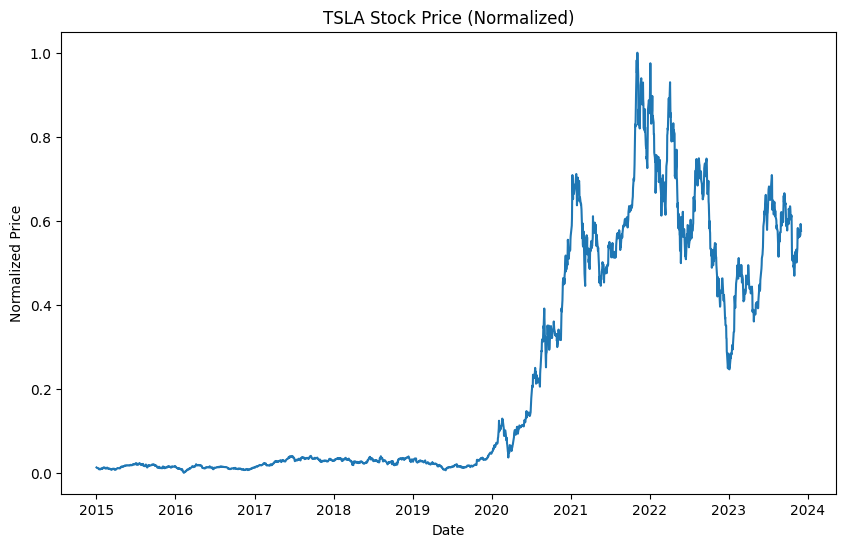

X_train shape: (1747, 60, 1)
X_test shape: (437, 60, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0145 - val_loss: 0.0012
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0011 - val_loss: 9.3019e-04
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 8.6678e-04 - val_loss: 8.8699e-04
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 9.4254e-04 - val_loss: 8.6459e-04
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 9.6231e-04 - val_loss: 8.3247e-04
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0012 - val_loss: 8.0790e-04
Epoch 12/20
55/55 ━━━━━━━━━━━━━

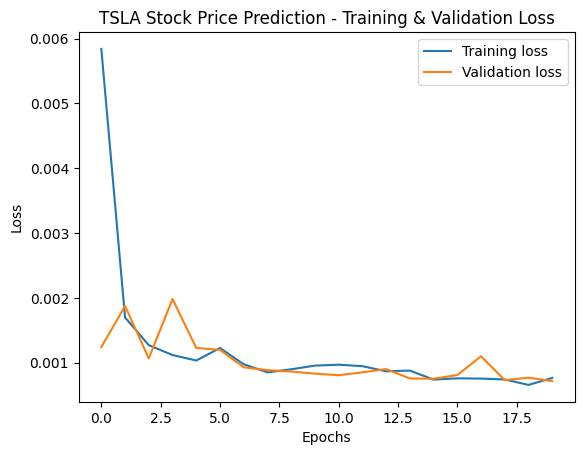

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


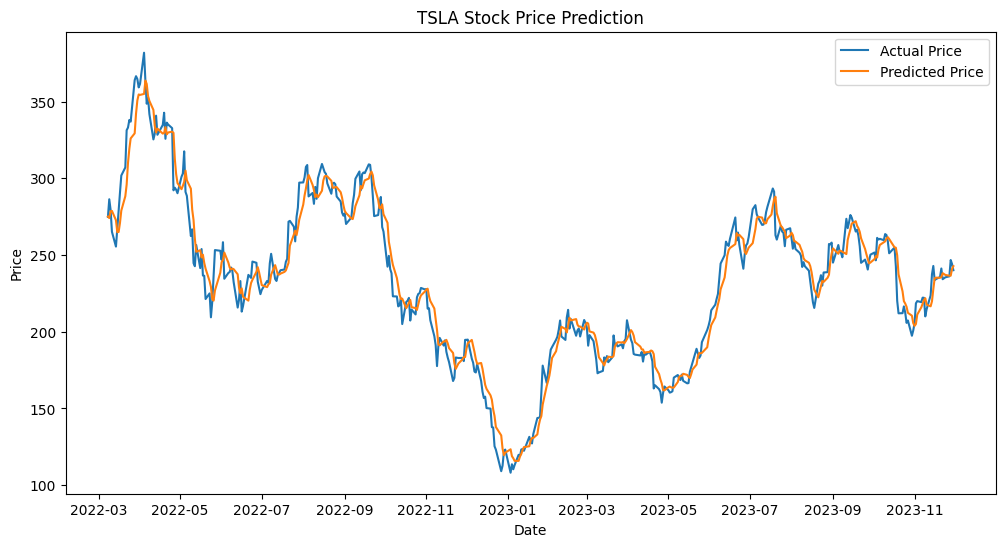

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Example: Download stock data for Tesla (TSLA)
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2023-12-01'
stock_data = get_stock_data(ticker, start_date, end_date)

# Check the downloaded data
stock_data.head()

# Use 'Close' price for prediction
data = stock_data[['Close']]

# Normalize the 'Close' price using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Visualize the scaled data
plt.figure(figsize=(10, 6))
plt.plot(data.index, scaled_data)
plt.title(f'{ticker} Stock Price (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.show()

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # past `time_step` prices
        y.append(data[i, 0])  # the next price (target)
    return np.array(X), np.array(y)

# Prepare dataset
time_step = 60  # Using the last 60 days to predict the next price
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be 3D [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of the prepared datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Build the GRU model
model = Sequential()

# First GRU layer with dropout regularization
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second GRU layer
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))  # Single output (the predicted stock price)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title(f'{ticker} Stock Price Prediction - Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



10. Implement stock market prediction using Long Short-Term
Memory (LSTM).

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0839
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0025
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0027
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0025
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0020
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0020
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0019
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0016
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0015
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0013
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0016
Epoch 16/50
62/

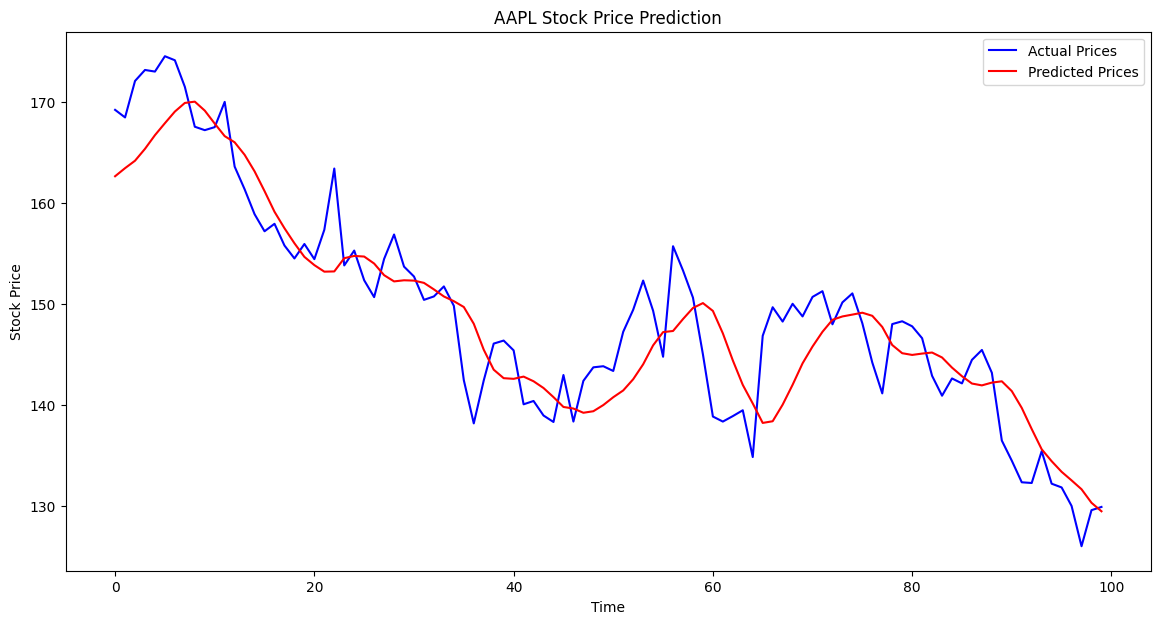

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Fetch and preprocess the stock market data
# Fetch historical stock price data
ticker = "AAPL" # Replace with your desired stock symbol
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")
prices = data["Close"].values.reshape(-1, 1)

# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)

# Prepare training data
sequence_length = 60 # Use the last 60 days to predict the next day's price
x_train, y_train = [], []
for i in range(sequence_length, len(scaled_data)):
  x_train.append(scaled_data[i-sequence_length:i, 0])
  y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Reshape for LSTM
input

# Step 2: Build the LSTM model
model = Sequential([
LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
Dropout(0.2),
LSTM(50, return_sequences=False),
Dropout(0.2),
Dense(25),
Dense(1)
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the model
model.fit(x_train, y_train, batch_size=32, epochs=50)

# Step 5: Test the model
# Create test data
test_data = scaled_data[len(scaled_data) - sequence_length - 100:] # Last 100 days for testing
x_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
  x_test.append(test_data[i-sequence_length:i, 0])
  y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get model predictions
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices) # Inverse scaling

# Step 6: Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(data["Close"].values[-len(y_test):], color="blue", label="Actual Prices")
plt.plot(predicted_prices, color="red", label="Predicted Prices")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()